## Observations and Insights 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_df = pd.DataFrame(mouse_metadata)
mouse_df

results_df = pd.DataFrame(study_results)
results_df

merge_df = pd.merge(mouse_df, results_df, on="Mouse ID")
merge_df.head(100)
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
len(merge_df["Mouse ID"].unique())


249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.duplicated(subset = ["Mouse ID","Timepoint"])
merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"])]                              
                               

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
new_merge_df = merge_df[merge_df["Mouse ID"] != "g989"]
new_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_merge_df.drop_duplicates(subset = ["Mouse ID"], keep = 'last', inplace = False)   

clean_df = new_merge_df.drop_duplicates(subset = ["Mouse ID"], keep = 'last', inplace = False)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [34]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

std = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)'] 

var = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

mean= clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

stat_table_df = pd.DataFrame({"Mean":mean, "Median": median, "Variance": var, "STD": std, "SEM": sem})
stat_table_df

# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,38.125164,5.715188,1.143038
Ceftamin,57.753977,59.851956,59.851956,8.365568,1.673114
Infubinol,58.178246,60.165180,60.165180,8.602957,1.720591
Ketapril,62.806191,64.487812,64.487812,9.945920,1.989184
Naftisol,61.205757,63.283288,63.283288,10.297083,2.059417
Placebo,60.508414,62.030594,62.030594,8.874672,1.774934
Propriva,56.493884,55.591622,55.591622,8.415626,1.717832
Ramicane,36.191390,36.561652,36.561652,5.671539,1.134308
Stelasyn,61.001707,62.192350,62.192350,9.504293,1.940056


In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

function = 'mean', 'median', 'var', 'std', 'sem'

agg_df = clean_df.groupby('Drug Regimen').agg(function)['Tumor Volume (mm3)']
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar Plots

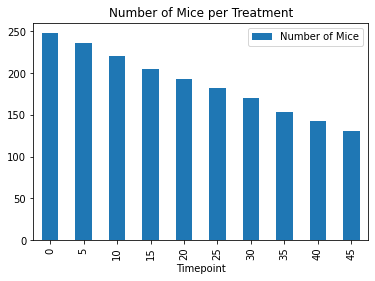

In [79]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
#using pandas.

barplot = new_merge_df[["Mouse ID", "Timepoint"]]
barplot1 = barplot.groupby("Timepoint")
barplot2 = barplot1.count()



data = {"Timepoint": [0,5,10,15,20,25,30,35,40,45],

        "Number of Mice" :[248,236,221,205,193,182,170,153,142,130]

        };

# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data = data)
# Draw a vertical bar chart
dataFrame.plot.bar(x="Timepoint", y="Number of Mice", title="Number of Mice per Treatment");

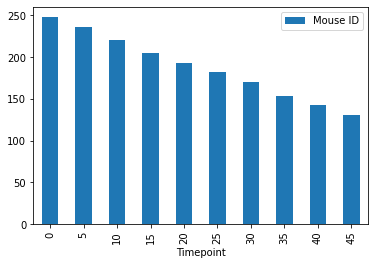

In [80]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
#using pyplot.

barplot = new_merge_df[["Mouse ID", "Timepoint"]]
barplot1 = barplot.groupby("Timepoint")
barplot2 = barplot1.count()

barplot2.plot(kind="bar")

plt.title = ("Number of Mice Per Treatment")
plt.xlabel = ("Timepoint")
plt.ylabel = ("Number of Mice")


## Pie Plots

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [19]:
''

''